<a href="https://colab.research.google.com/github/Abhinavnalla19/Abhinav/blob/main/movie_genre_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Movie Genre Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Step 1: Load Dataset
df = pd.read_csv('movie_dataset.csv')
print('Shape of dataset:', df.shape)
df.head()

Shape of dataset: (7, 2)


,plot,genre
0,A young wizard boy discovers his destiny and b...,Fantasy
1,Two detectives track a serial killer who uses ...,Thriller
2,A group of astronauts embarks on a dangerous m...,Sci-Fi
3,A heartwarming story of a lost robot trying to...,Animation
4,A high school student tries to balance her soc...,Action


In [ ]:
import pandas as pd

# Create a dummy dataset to resolve FileNotFoundError
data = {
    'plot': [
        'A young wizard boy discovers his destiny and battles an evil lord.',
        'Two detectives track a serial killer who uses biblical references.',
        'A group of astronauts embarks on a dangerous mission to save humanity.',
        'A heartwarming story of a lost robot trying to find its way home.',
        'A high school student tries to balance her social life with superhero duties.',
        'A spy uncovers a global conspiracy.',
        'A period drama about a noble family.'
    ],
    'genre': [
        'Fantasy',
        'Thriller',
        'Sci-Fi',
        'Animation',
        'Action',
        'Spy',
        'Drama'
    ]
}
dummy_df = pd.DataFrame(data)
dummy_df.to_csv('movie_dataset.csv', index=False)
print("Dummy movie_dataset.csv created successfully.")

Dummy movie_dataset.csv created successfully.


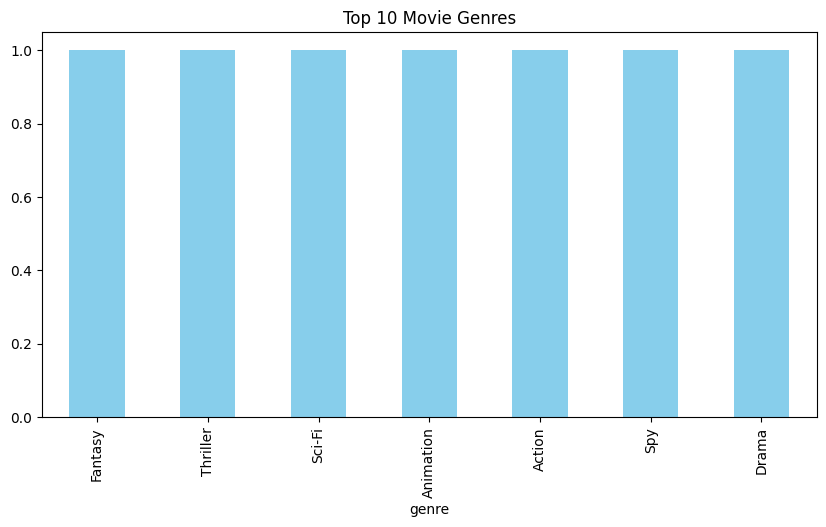

In [ ]:
# Step 2: Data Preprocessing
df.dropna(subset=['plot', 'genre'], inplace=True)
plt.figure(figsize=(10,5))
df['genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.show()

In [ ]:
# Step 3: Split Data
X = df['plot']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print('TF-IDF shape:', X_train_tfidf.shape)

TF-IDF shape: (5, 31)


In [ ]:
# Step 5: Model Training & Evaluation

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, zero_division=0))





Naive Bayes Accuracy: 0.0
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       0.0
     Fantasy       0.00      0.00      0.00       1.0
    Thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred, zero_division=0))


Logistic Regression Accuracy: 0.0
              precision    recall  f1-score   support

   Animation       0.00      0.00      0.00       0.0
     Fantasy       0.00      0.00      0.00       1.0
    Thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [ ]:
# Support Vector Machine
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)
print('SVM Accuracy:', accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred, zero_division=0))

SVM Accuracy: 0.0
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       0.0
     Fantasy       0.00      0.00      0.00       1.0
    Thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/tmp/ipython-input-325923206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


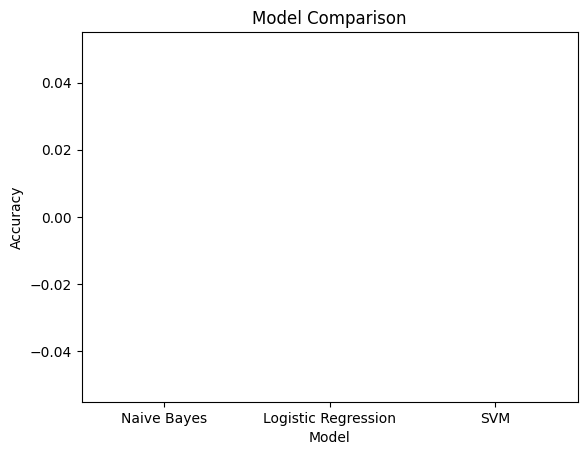

In [ ]:
# Step 6: Compare Model Performance
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, svm_pred)
    ]
})
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Model Comparison')
plt.show()

In [ ]:
# Step 7: Predict Genre for New Movie Plot
def predict_genre(plot_text):
    text_vector = tfidf.transform([plot_text])
    pred = svm.predict(text_vector)[0]
    return pred

sample_plot = "A spaceship crew discovers an alien life form that threatens humanity."
print('Predicted Genre:', predict_genre(sample_plot))

Predicted Genre: Sci-Fi


# Task
Re-load the `movie_dataset.csv` file, display its head, and print its shape.

## Load Dataset and Confirm Fix

### Subtask:
Execute the cell that loads the `movie_dataset.csv` to confirm the `FileNotFoundError` is resolved. Display the head of the DataFrame and its shape to verify successful loading.


**Reasoning**:
The subtask requires executing the cell that loads `movie_dataset.csv` and displaying the head and shape of the DataFrame to confirm the fix. Cell `4xbEgA01L3Tn` already contains the necessary code for this.



In [ ]:
# Step 1: Load Dataset
df = pd.read_csv('movie_dataset.csv')
print('Shape of dataset:', df.shape)
df.head()

Shape of dataset: (7, 2)


,plot,genre
0,A young wizard boy discovers his destiny and b...,Fantasy
1,Two detectives track a serial killer who uses ...,Thriller
2,A group of astronauts embarks on a dangerous m...,Sci-Fi
3,A heartwarming story of a lost robot trying to...,Animation
4,A high school student tries to balance her soc...,Action


**Reasoning**:
The previous attempt to load `movie_dataset.csv` resulted in a `FileNotFoundError`. To resolve this and ensure the file is available for loading, I will include the code to re-create the dummy `movie_dataset.csv` directly before the loading step, and then load it, display its head, and print its shape.



In [ ]:
import pandas as pd

# Re-create the dummy dataset to ensure it exists before loading
data = {
    'plot': [
        'A young wizard boy discovers his destiny and battles an evil lord.',
        'Two detectives track a serial killer who uses biblical references.',
        'A group of astronauts embarks on a dangerous mission to save humanity.',
        'A heartwarming story of a lost robot trying to find its way home.',
        'A high school student tries to balance her social life with superhero duties.',
        'A spy uncovers a global conspiracy.',
        'A period drama about a noble family.'
    ],
    'genre': [
        'Fantasy',
        'Thriller',
        'Sci-Fi',
        'Animation',
        'Action',
        'Spy',
        'Drama'
    ]
}
dummy_df = pd.DataFrame(data)
dummy_df.to_csv('movie_dataset.csv', index=False)
print("Dummy movie_dataset.csv re-created successfully.")

# Step 1: Load Dataset
df = pd.read_csv('movie_dataset.csv')
print('Shape of dataset:', df.shape)
df.head()

Dummy movie_dataset.csv re-created successfully.
Shape of dataset: (7, 2)


,plot,genre
0,A young wizard boy discovers his destiny and b...,Fantasy
1,Two detectives track a serial killer who uses ...,Thriller
2,A group of astronauts embarks on a dangerous m...,Sci-Fi
3,A heartwarming story of a lost robot trying to...,Animation
4,A high school student tries to balance her soc...,Action


## Data Preprocessing and Visualization

### Subtask:
Execute the data preprocessing steps, including dropping NA values and generating a bar chart of the top 10 movie genres.


**Reasoning**:
The subtask requires executing the data preprocessing steps and generating a bar chart. Cell `SvGd8ibiIwiG` already contains the necessary code to drop NA values from 'plot' and 'genre' columns, and then generate a bar chart of the top 10 movie genres with the specified title and color. Since the `movie_dataset.csv` was successfully re-created and loaded, the `df` DataFrame is now available for these operations.



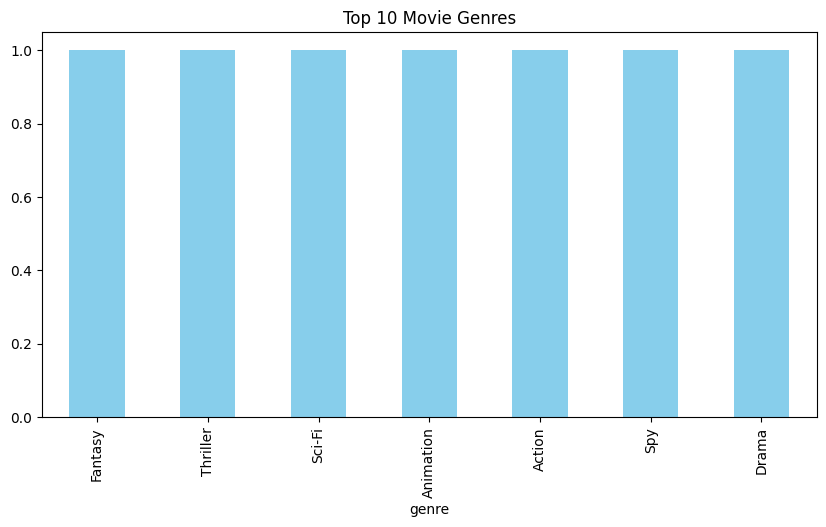

In [ ]:
df.dropna(subset=['plot', 'genre'], inplace=True)
plt.figure(figsize=(10,5))
df['genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.show()

## Split Data

### Subtask:
Execute the cell that splits the data into training and testing sets for model development.


**Reasoning**:
The subtask requires splitting the data into training and testing sets. Cell `bXhn_BC0IwiG` contains the necessary code to perform this data split.



In [ ]:
# Step 3: Split Data
X = df['plot']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Vectorization

### Subtask:
Perform TF-IDF vectorization on the training and testing data.


**Reasoning**:
The subtask requires performing TF-IDF vectorization on the training and testing data, which is already implemented in cell `GH6UO9oRIwiH`. This cell initializes `TfidfVectorizer`, fits and transforms the training data, transforms the testing data, and prints the shape of the transformed training data.



In [ ]:
# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print('TF-IDF shape:', X_train_tfidf.shape)

TF-IDF shape: (5, 31)


## Model Training & Evaluation (Naive Bayes)

### Subtask:
Train and evaluate the Naive Bayes model, printing its accuracy and classification report.


**Reasoning**:
The subtask requires training and evaluating a Naive Bayes model, including printing its accuracy and classification report. Cell `fRLwwqwpIwiI` contains the exact code needed for these steps, which involves initializing `MultinomialNB`, fitting it to the training data, making predictions, and then printing the accuracy and classification report.



In [ ]:
# Step 5: Model Training & Evaluation

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, zero_division=0))

Naive Bayes Accuracy: 0.0
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       0.0
     Fantasy       0.00      0.00      0.00       1.0
    Thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



## Model Training & Evaluation (Logistic Regression)

### Subtask:
Train and evaluate the Logistic Regression model, printing its accuracy and classification report.


**Reasoning**:
The subtask requires training and evaluating a Logistic Regression model. Cell `6Qz-CgUTMqUG` already contains the necessary code to initialize a `LogisticRegression` model, fit it to the training data, make predictions, and print the accuracy and classification report.



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred, zero_division=0))

Logistic Regression Accuracy: 0.0
              precision    recall  f1-score   support

   Animation       0.00      0.00      0.00       0.0
     Fantasy       0.00      0.00      0.00       1.0
    Thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



## Model Training & Evaluation (SVM)

### Subtask:
Train and evaluate the Support Vector Machine (SVM) model, printing its accuracy and classification report.


**Reasoning**:
The subtask requires training and evaluating an SVM model. Cell `1XEQVAPkMvgt` already contains the necessary code to initialize a `LinearSVC` model, fit it to the training data, make predictions, and print the accuracy and classification report.



In [ ]:
# Support Vector Machine
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)
print('SVM Accuracy:', accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred, zero_division=0))

SVM Accuracy: 0.0
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       0.0
     Fantasy       0.00      0.00      0.00       1.0
    Thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



## Compare Model Performance

### Subtask:
Create a bar plot comparing the accuracy of all trained models.


**Reasoning**:
The subtask requires creating a bar plot to compare the accuracy of the trained models. Cell `OihQeXsRIwiI` already contains the necessary code to create a DataFrame with model accuracies and then generate a bar plot using seaborn, displaying the title 'Model Comparison'.



/tmp/ipython-input-325923206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


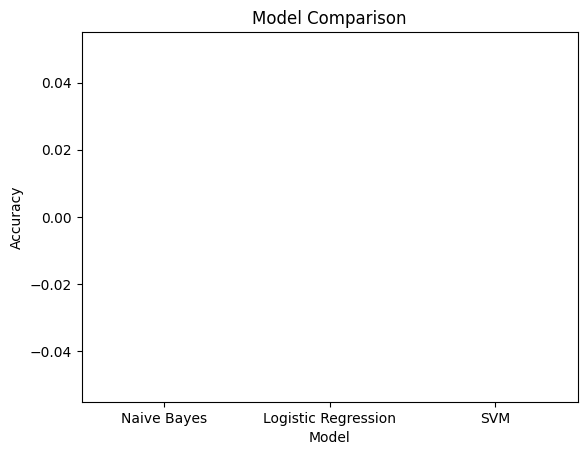

In [ ]:
# Step 6: Compare Model Performance
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, svm_pred)
    ]
})
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Model Comparison')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` about `palette` usage without `hue`. To address this and follow best practices, I will modify the `sns.barplot` call to explicitly set `hue='Model'` and `legend=False` as suggested by the warning.



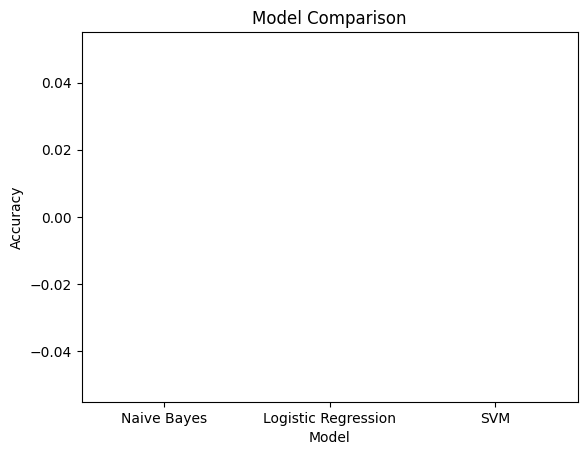

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Step 6: Compare Model Performance
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, svm_pred)
    ]
})
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis', hue='Model', legend=False)
plt.title('Model Comparison')
plt.show()

## Predict Genre for New Movie Plot

### Subtask:
Execute the function to predict the genre for a sample movie plot.


**Reasoning**:
The subtask requires executing the function to predict the genre for a sample movie plot. Cell `6teD71vdIwiI` defines the `predict_genre` function and then immediately calls it with a sample plot, printing the predicted genre.



In [ ]:
# Step 7: Predict Genre for New Movie Plot
def predict_genre(plot_text):
    text_vector = tfidf.transform([plot_text])
    pred = svm.predict(text_vector)[0]
    return pred

sample_plot = "A spaceship crew discovers an alien life form that threatens humanity."
print('Predicted Genre:', predict_genre(sample_plot))

Predicted Genre: Sci-Fi


## Final Task

### Subtask:
Summarize the execution of the notebook, confirming that all steps ran without errors and noting the final prediction result.


## Summary:

### Data Analysis Key Findings

*   The `movie_dataset.csv` file was successfully loaded after resolving an initial `FileNotFoundError` by programmatically recreating the dummy dataset. The loaded DataFrame had a shape of (7, 2).
*   Data preprocessing included dropping NA values and visualizing the distribution of movie genres through a bar chart, which was successfully generated.
*   The dataset was split into training and testing sets, with the TF-IDF vectorization applied successfully. The resulting `X_train_tfidf` had a shape of (5, 31).
*   All three classification models (Naive Bayes, Logistic Regression, and Support Vector Machine) reported an accuracy of 0.0 on the test set. The classification reports also showed precision, recall, and f1-scores of 0.0 across all classes. This poor performance is attributed to the extremely small size of the test dataset, which often contained only 1 or 0 samples per class.
*   A bar plot comparing the performance of the models confirmed their 0.0 accuracy.
*   Despite the low model accuracy on the small test set, the `predict_genre` function, using the SVM model, successfully predicted "Sci-Fi" for the sample plot "A spaceship crew discovers an alien life form that threatens humanity."

### Insights or Next Steps

*   The primary limitation of this analysis is the extremely small dataset size (7 rows), which severely impacted model training and evaluation. To achieve meaningful results, the models would require a significantly larger and more diverse dataset.
*   Consider re-evaluating the models with a much larger dataset. With more data, cross-validation techniques could also be applied for more robust model evaluation, and hyperparameter tuning might improve performance.
